# Milestone 1 - Data Visualization Complementary Views 

## Author - AngelaQiqianYang



## Instructions and <font color='blue'> Answer guide </font>
1. Generate a clear statement problem and provide location for dataset;(Is there an introduction with a clear statement of the problem to be addressed?) <font color='blue'> The task is find the features which yield the high price in housing. The details of features and explaination are listed in 'Main Findings'</font>
2. Provide a clear solution to the problem for a non-technical audience <font color='blue'> My solutions to problem are break down under step 3</font>
3. Visually explore the data to generate insight and include summary statistics. (Given the data set and the stated problem, does the data exploration find enlightening relationships in the data? Is the exploration truly in-depth? Are the steps used and inferences drawn clearly explained?) <font color='blue'> Please see the analysis and visulizations break down under step 3 below</font>

## Main findings 
 - <font color='red'> More bathrooms can lead to higher home price. Especially, if bathrooms are increased from 3.5 to 5.5, the price could dramatically dump up fror 50,000 dollars, sometimes even a million dollars more.
 - More sqaure footages, including living space, basement space, and sapces above basement could lead to higher house price.
 - Renovation help raise house price. 
 - Location matters. The hight price houses tend to have lower zipcode: most of them are located at around 98000 to 98050. 
 - The places, where latitude ranges from 47.60 to 47.65 and longtitude ranges from -122.20 to -122.25, holds most density of high priced home.
 - More viewing traffic to the home, higher home price it is.

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load data
file_path = r'C:\Users\sduya\Desktop\UW2\kc_house_data.csv'
house_df = pd.read_csv(file_path)
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Step 1: Data Preparation

In [11]:
my_df = house_df

#### 1. Missing data:
There is no missing data in the table

In [12]:
my_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 2. Outliers
The plot below is the kernel desnity estimate of housing price. Notice that the distribution is heavily skewed to the right or high side. This finding is consistent with the other displays I have created with histograms and box plots (listed below).Even though, lots of outliers (high home prices) in the data table, I will not eliminate them. The reason is that the analysis task here is to find out  home features would yield a high price, which would be the outliers. 

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

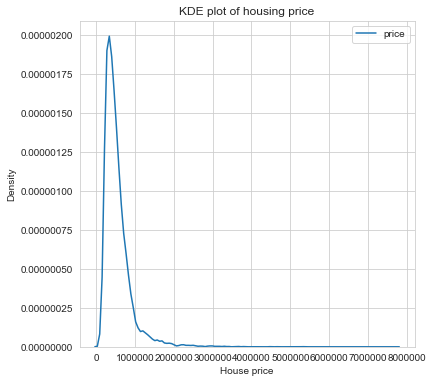

In [21]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
sns.kdeplot(my_df.loc[:, 'price'], ax = ax)
ax.set_title('KDE plot of housing price') # Give the plot a main title
ax.set_xlabel('House price') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

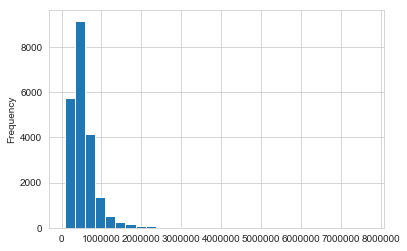

In [22]:
my_df.loc[:,'price'].plot.hist(bins = 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1622eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x162a3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1622bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x162a930>],
 'fliers': [<matplotlib.lines.Line2D at 0x162abb0>],
 'means': []}

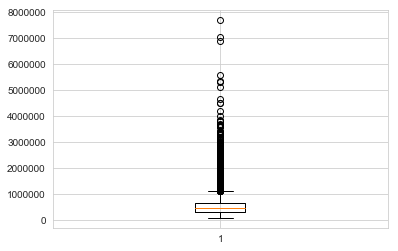

In [23]:
plt.boxplot(my_df.loc[:,'price'])

### Step 2: Correlation analysis 

Based on the plot above, lighter color (either red or blue) means stronger correlated relationship. The house price is positively correlated with all features, and specifically strong with square footage of the home, livng room and areas apart from basedment, numbers of bathrooms, and house grade. Among features selves, bedroom, bathrooms, grade, sqft living spaces and sqft apart from basement have strong impact towards each other. Negative correlation is unuasual, except house condiction is negatively correlated with floor numbers and year of built. Floor number is also negatively correlated with basement sq ft. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text xticklabel objects>)

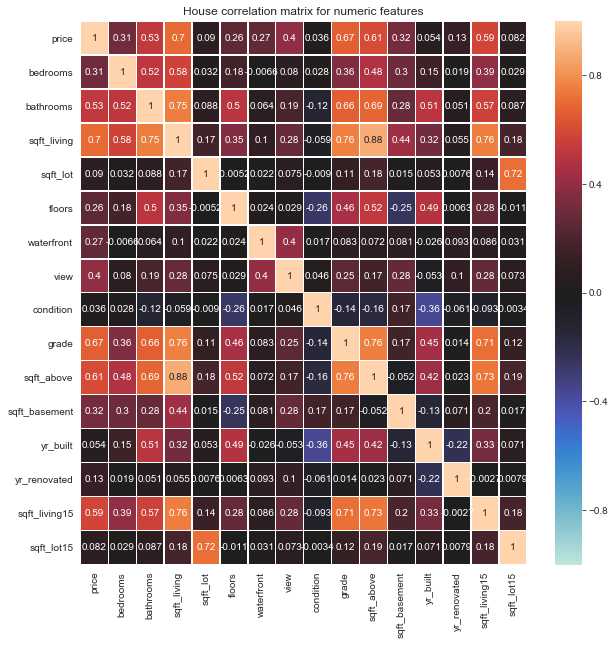

In [306]:
house_corr = my_df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
                       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                       'sqft_living15', 'sqft_lot15']].corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(house_corr, 
            vmin=-1, 
            vmax=1, 
            center=0, 
            annot=True, #show the correlatrion value in cell
            linewidths=.5) 
plt.title('House correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

### Step 3: House features analysis

#### 1. Housing price and selected features pariplot overview
Based on the correlation analysis, we know bedroom, bathroom, variables of sq ft, grade are important to price. So I used pariplot to get a sense of distributions of the data. From plot, I conclude that the linear regression exists between price and features. Interesting enough, the grade also have linear relationship to bedroom, barthroom numbers, as well as sq.ft.  

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_sca

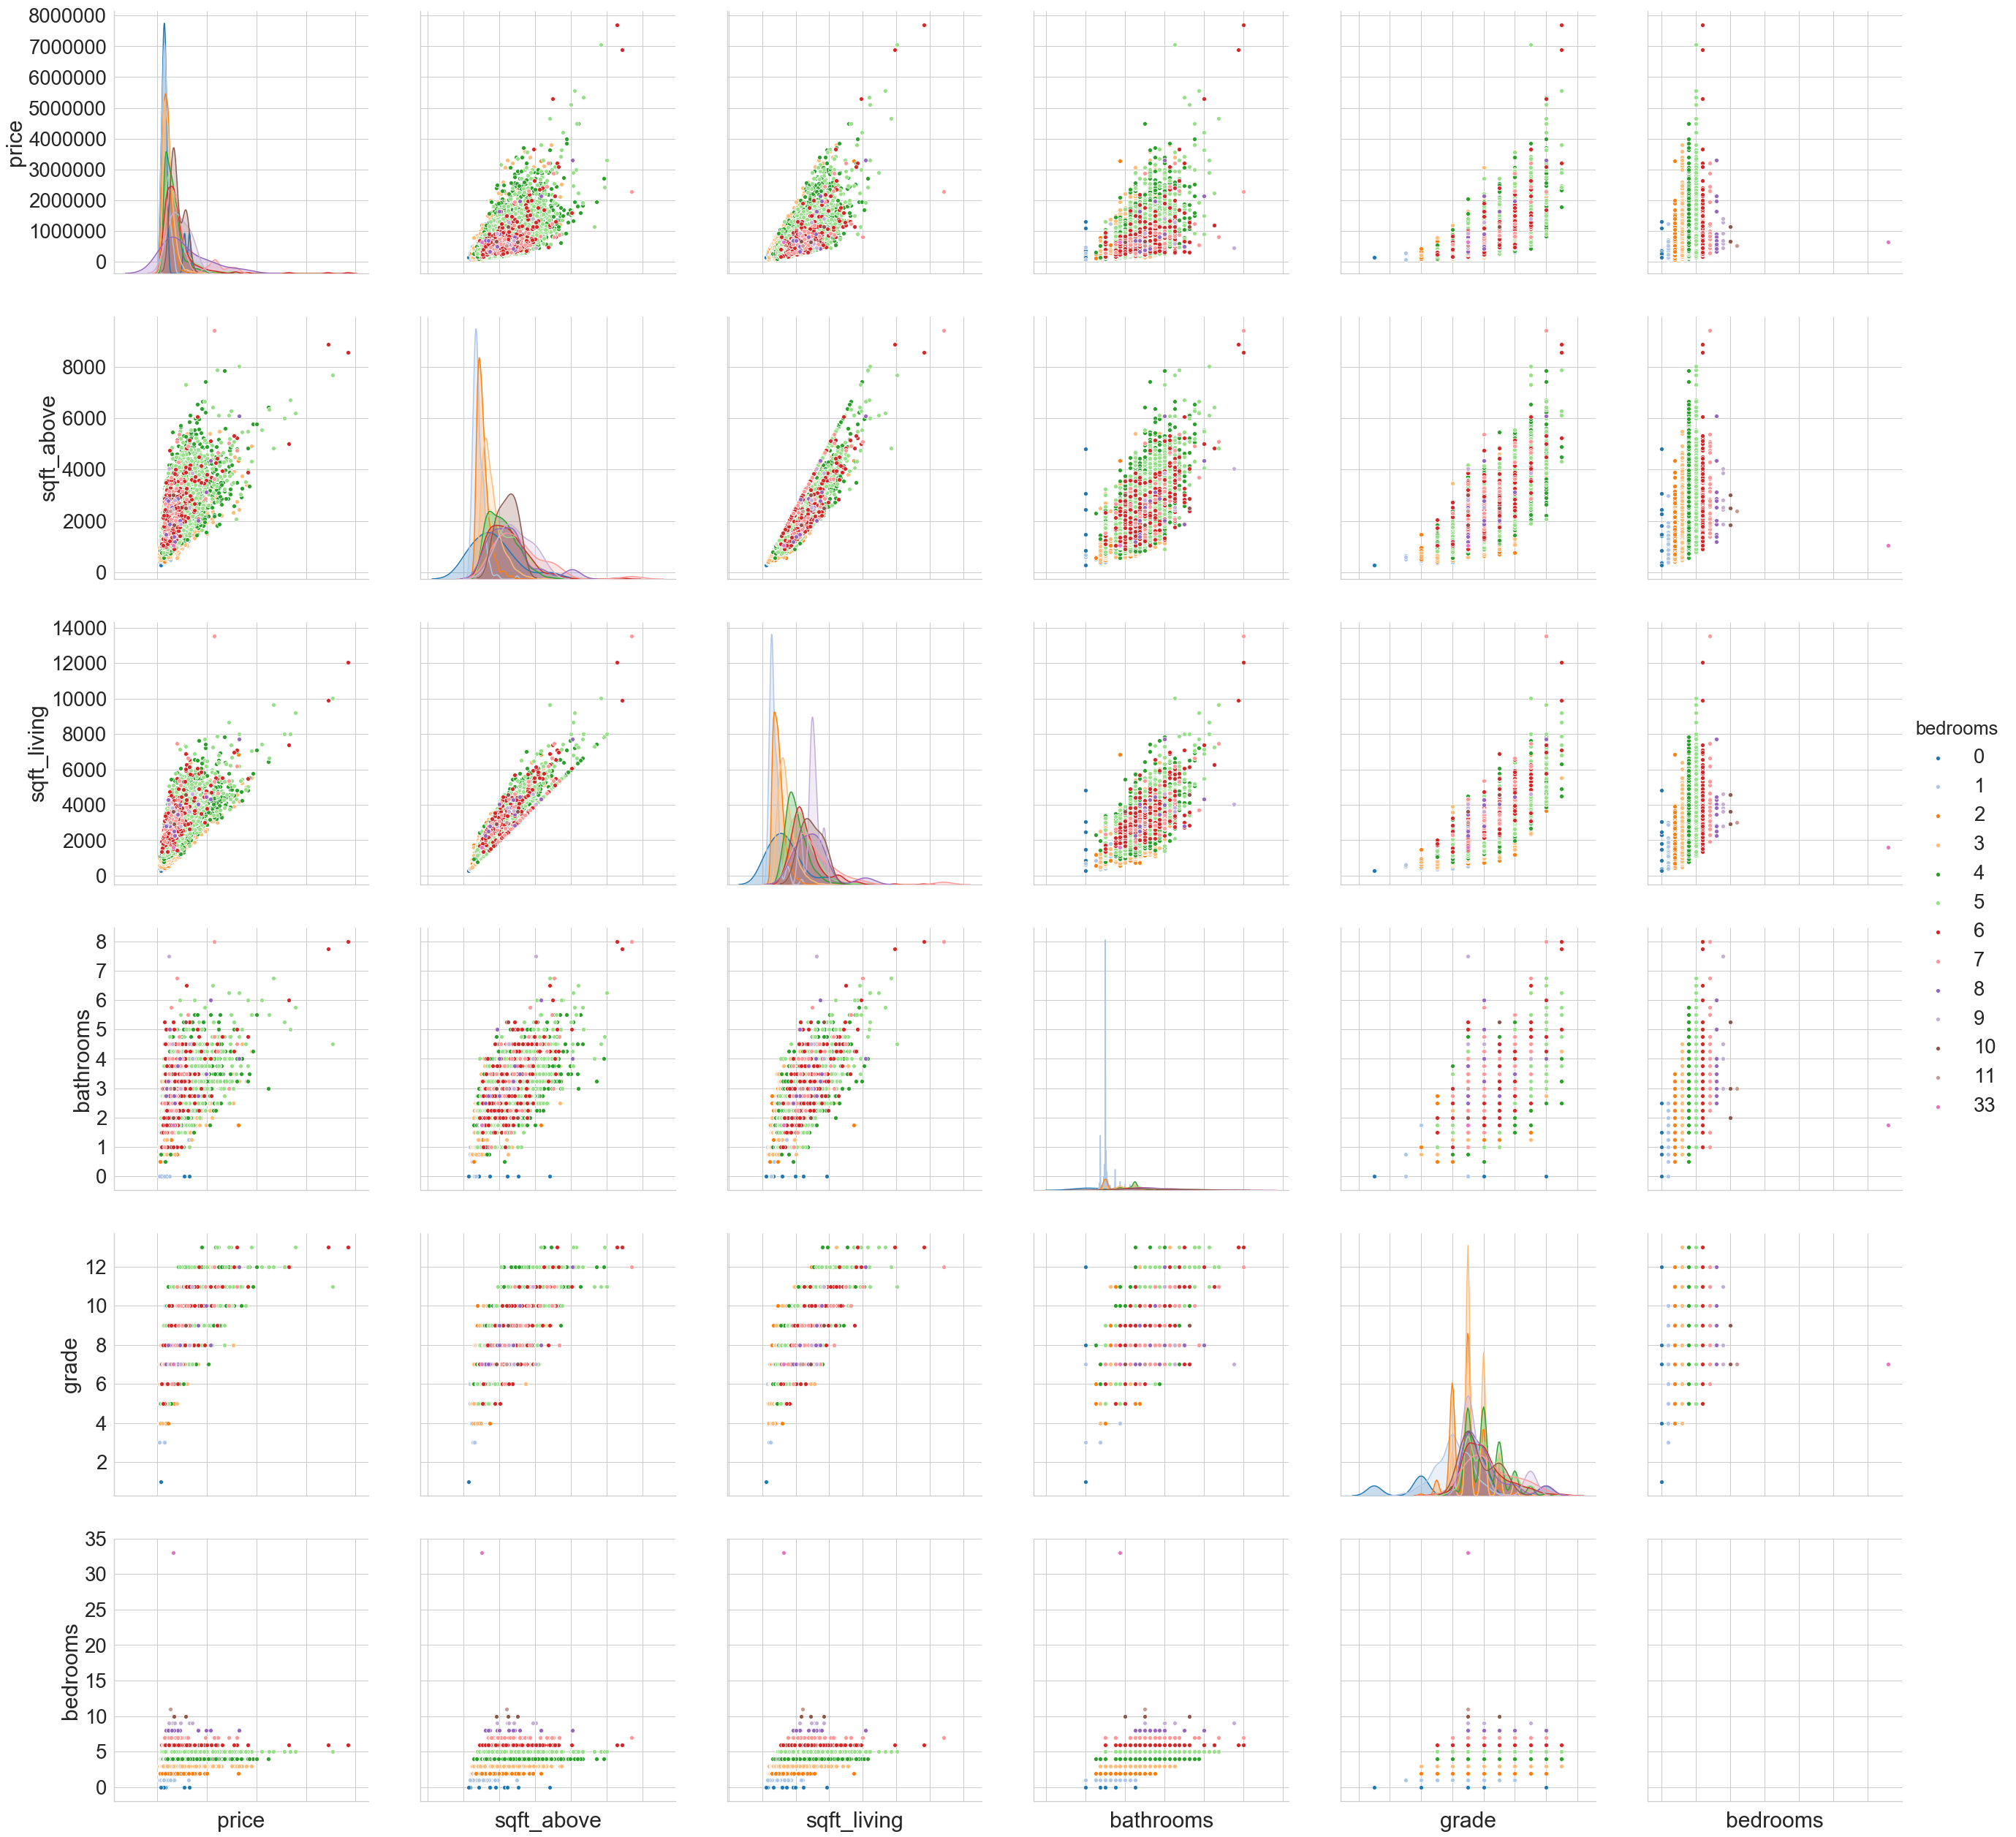

In [45]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(my_df[['price','sqft_above','sqft_living',
                            'bathrooms', 'grade','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);


#### 2. Bathroom and Bedroom: does it mean more is better? 
With the direction revealed above, I plot the density maps for bathrooms, bedrooms. I bined, counted the house price for features, then visulized them in heat map. <font color='red'> More bathrooms can lead to higher price of the house. Especially, if bathrooms are increased from 3.5 to 5.5, the price could dramatically dump up fror 50,000 dollars, sometimes even a million dollars more. </font> However, this rule doesn't necessary apply in bedroom feature. As density map revealed, only if <font color='red'> increase bedrooms from 4 to 5, the price will probably just increase by $30,000. </font>

In [112]:
my_df[my_df['price_bin'] == 2]['price'].median()

949995.0

In [127]:
def housing_price_heat_map(my_df, feature_name, bin_num):
    # binning price into 20 bins
    my_df.loc[:, 'price_bin'] = pd.cut(my_df.loc[:, 'price'], bins = bin_num, labels = range(bin_num))
    my_df.loc[:, 'price_bin'].head(10)
    # count how many houses within each bin
    feature_price = pd.crosstab(my_df.loc[:, 'price_bin'], my_df.loc[:, feature_name])
    # normalize the count numbers, so we can get the density value 
    total_num_houses = feature_price.apply(sum, axis = 0)
    feature_price = feature_price.div(total_num_houses, axis = 1)
    # plot the density map with seaborn
    ax = plt.figure(figsize=(4, 4)).gca() # define axis
    ax.pcolor(feature_price, cmap = 'Blues')
    ax.set_xticks(range(feature_price.shape[1])) 
    ax.set_xticklabels(feature_price.columns, rotation=90)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('House Price Bin')
    title_name = 'House price ranges by ' + feature_name
    ax.set_title(title_name)

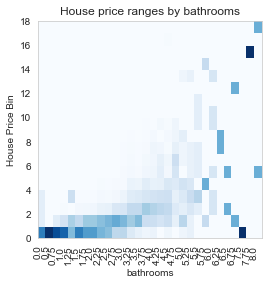

In [128]:
housing_price_heat_map(my_df, 'bathrooms', 20)

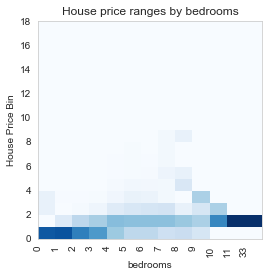

In [129]:
housing_price_heat_map(my_df, 'bedrooms', 20)

#### 3. Larger space, vertical and horizontal, means high price? 
From density plots, we can see the living space (either original or renovated houses), size above basement and basement size are strongly impact the house price. <font color='red'> More living space, basement size, and sizes above basement could lead to higher house price. </font> However the lot size won't relfect the price much. Same as floor number that more floors don't drive higher house price. 

In [147]:
my_df.loc[:, 'sqft_living_bin'] = pd.cut(my_df.loc[:, 'sqft_living'], bins = 10, labels = range(10))
my_df.loc[:, 'sqft_lot_bin'] = pd.cut(my_df.loc[:, 'sqft_lot'], bins = 10, labels = range(10))
my_df.loc[:, 'sqft_above_bin'] = pd.cut(my_df.loc[:, 'sqft_above'], bins = 10, labels = range(10))
my_df.loc[:, 'sqft_living15_bin'] = pd.cut(my_df.loc[:, 'sqft_living15'], bins = 10, labels = range(10))
my_df.loc[:, 'sqft_basedment_bin'] = pd.cut(my_df.loc[:, 'sqft_basement'], bins = 10, labels = range(10))

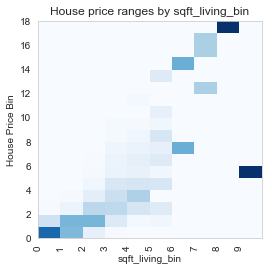

In [130]:
housing_price_heat_map(my_df, 'sqft_living_bin', 20)

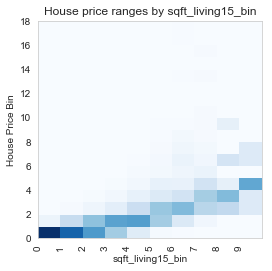

In [131]:
housing_price_heat_map(my_df, 'sqft_living15_bin', 20)

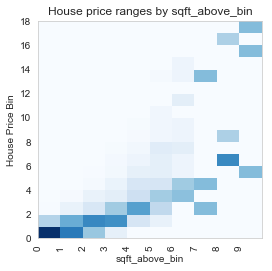

In [132]:
housing_price_heat_map(my_df, 'sqft_above_bin', 20)

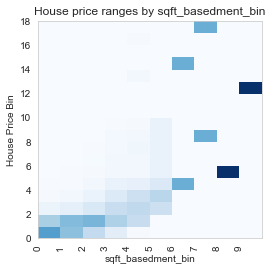

In [150]:
housing_price_heat_map(my_df, 'sqft_basedment_bin', 20)

Text(0,0.5,'Auto Price')

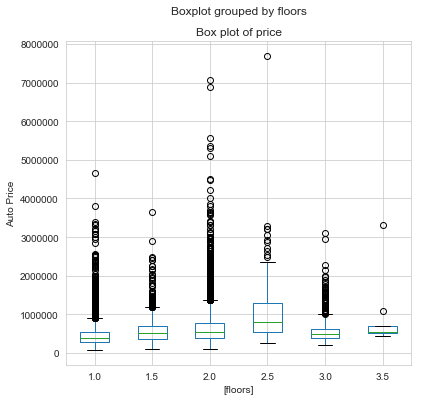

In [142]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
my_df.loc[:,['price', 'floors']].boxplot(by = 'floors', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
#ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

#### 4. Does renovation help raise house price?
Yes, <font color='red'> renovation does help raise house price. </font> The average price, for most of the sales dates, renovated houses (orange line) is higher than not-renovated houses (blue line). This trend is much obvious if we compare average prices by year. The time series plots are listed below. Because bathroom number impact the house price foundamentaly, so I created a violin plot to look up the prices by bathroom number and w/o renovation condition. The finding is that <font color='red'> renovation will help raise price if bathroom number is less than 3.5. However, if bathroom is more than 3.5, a renovation doesn't tend to really drive price higher. </font>

In [155]:
# set the date time from original data format in datetime format, so we can plot it as time series 
my_df.loc[:, 'date'] = pd.to_datetime(my_df.loc[:, 'date'])
my_df.shape

(21613, 27)

In [236]:
# make a new dataframe only store the renovated houses
my_df['renov_yes'] = 0
my_df.loc[my_df['yr_renovated']!= 0 ,'renov_yes'] = 1
my_df_renov = my_df[my_df['renov_yes'] == 1]
my_df_nonrenov = my_df[my_df['renov_yes'] == 0]
# make two new dataframe to hold non-renovated and revonvated house price seperated
my_df_nonrenov2 = my_df_nonrenov.groupby(['date'])['date','price'].mean() #just keep the fields/info I want. 
my_df_nonrenov2 = pd.DataFrame(my_df_nonrenov2)
my_df_renov2 = my_df_renov.groupby(['date'])['date','price'].mean() #just keep the fields/info I want. 
my_df_renov2 = pd.DataFrame(my_df_renov2)

Text(0.5,1,'Time series of average house price for w/o renovated house, daily basis')

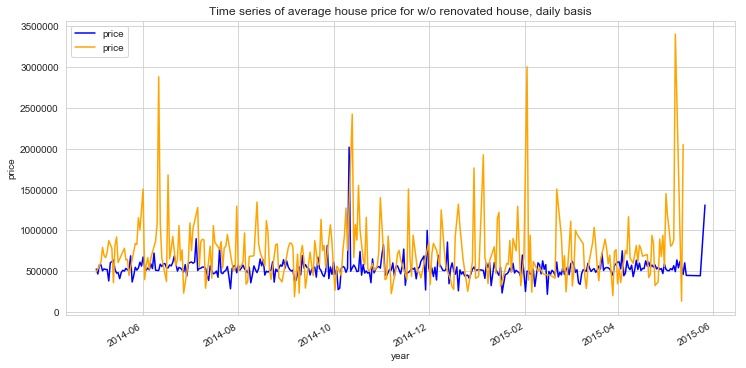

In [240]:
ax = plt.figure(figsize=(12, 6)).gca() # define axis
my_df_nonrenov2.plot(ax = ax, kind='line', color='blue')
my_df_renov2.plot(ax = ax, kind='line', color='orange')
ax.set_xlabel('year')
ax.set_ylabel('price')
ax.set_title('Time series of average house price for w/o renovated house, daily basis')

Text(0.5,1,'Time series of average house price for w/o renovated house, yearly basis')

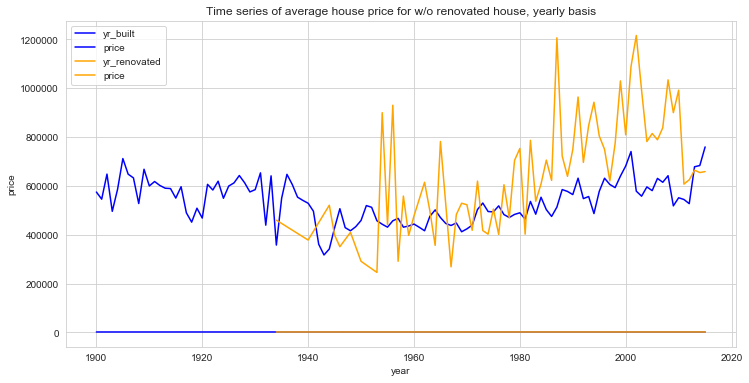

In [242]:
# make two new dataframe to hold built year house price and revonvated house price seperated
my_df_nonrenov3 = my_df_nonrenov.groupby(['yr_built'])['yr_built','price'].mean() #just keep the fields/info I want. 
my_df_nonrenov3 = pd.DataFrame(my_df_nonrenov3)
my_df_renov3 = my_df_renov.groupby(['yr_renovated'])['yr_renovated','price'].mean() #just keep the fields/info I want. 
my_df_renov3 = pd.DataFrame(my_df_renov3)
ax = plt.figure(figsize=(12, 6)).gca() # define axis
my_df_nonrenov3.plot(ax = ax, kind='line', color='blue')
my_df_renov3.plot(ax = ax, kind='line', color='orange')
ax.set_xlabel('year')
ax.set_ylabel('price')
ax.set_title('Time series of average house price for w/o renovated house, yearly basis')

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'House price')

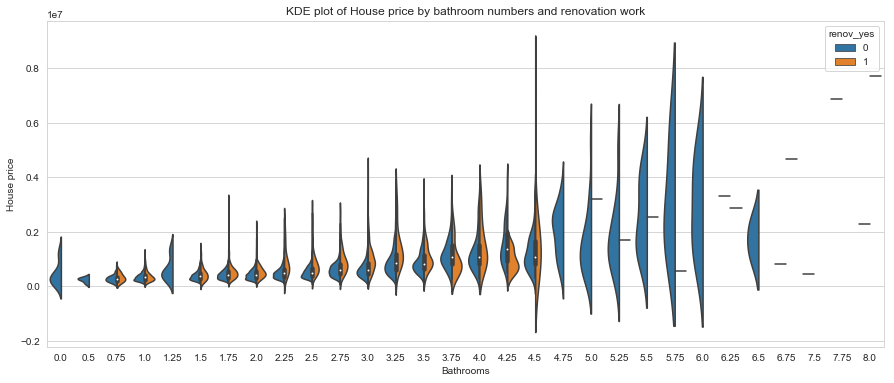

In [248]:
# visuliza the house price by bathroom numbers and house was renovated or not 
fig = plt.figure(figsize=(15,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'bathrooms', y = 'price', hue = 'renov_yes',
               data = my_df, ax = ax, split=True)
ax.set_title('KDE plot of House price by bathroom numbers and renovation work') # Give the plot a main title
ax.set_xlabel('Bathrooms') # Set text for the x axis
ax.set_ylabel('House price')# Set text for y axis

#### 5. They said the universal golden rule: "location, location, location!"
From the box plot below, we can see <font color='red'> the hight price houses tend to have lower zipcode: most of them are located at around 98000 to 98050. </font> And then I took out houses which sold for more than 3 million dollars. To do this, I am able to find out the most frequent geo location (latitude, longtitude) for high priced homes. Based on the plots, <font color='red'> the places, where latitude ranges from 47.60 to 47.65 and longtitude ranges from -122.20 to -122.25, holds most density of high priced home. </font>

In [256]:
my_df['zipcode'] = my_df['zipcode'].astype(int)

Text(0,0.5,'House price')

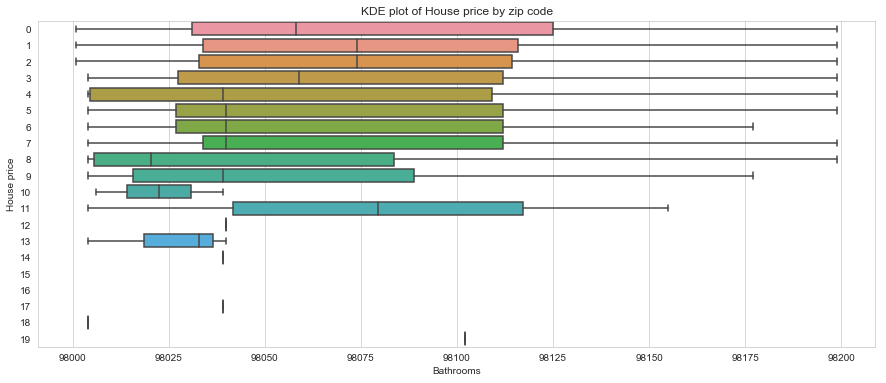

In [274]:
# all homes price on zipcode 
fig = plt.figure(figsize=(15,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'zipcode', y = 'price_bin', data = my_df, ax = ax)
ax.set_title('Box plot of house price by zip code') # Give the plot a main title
ax.set_xlabel('Zipcode') # Set text for the x axis
ax.set_ylabel('House price')# Set text for y axis

c:\users\sduya\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


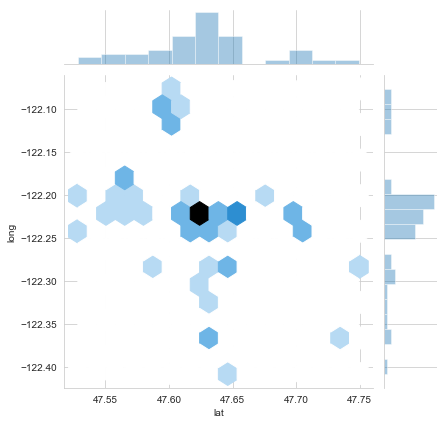

In [288]:
# hext plot for the $3 million+ houses and their latitude, longtitude 
my_df_high_price = my_df[my_df['price'] >= 3000000]
g = sns.jointplot("lat", "long", data=my_df_high_price, kind="hex")

#### 6. Does more traffic mean the house is popular? 
Yes, more views does lead to higher house prices, but the impact is very minor. From the box plot below we can see the houses with more views, the medium prices are slightly higher. So the suggestion here would be <font color='red'> try to do more advertisement or apply marketing strategies to attract more viewing traffic to the home. </font>

Text(0.5,0,'view')

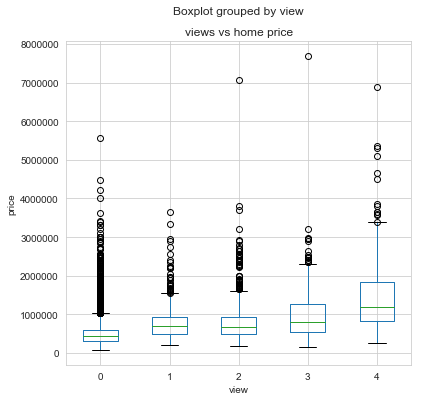

In [305]:
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
my_df.loc[:,['view', 'price']].boxplot(by = 'view', ax = ax)
ax.set_title('views vs home price') # Give the plot a main title
ax.set_ylabel('price')# Set text for y axis
ax.set_xlabel('view')

In [310]:
print ('Thanks for reviewing!')

Thanks for reviewing!
